# Lab1: Real-World Data Cleaning, Transformation, and Visualization


Objective: This project aims to undertake real worl data preprocessing, cleaning, transforming and visualization 

In [1]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn

In [69]:
#Reading the titanic data from the Seaborn Library
titanic = sn.load_dataset('titanic')

## Exploring the dataset

In [33]:
#checking the first five rows
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [34]:
#checking the last five rows
titanic.tail()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
886,0,2,male,27.0,0,0,13.00,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.00,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.45,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.00,C,First,man,True,C,Cherbourg,yes,True
890,0,3,male,32.0,0,0,7.75,Q,Third,man,True,NaN,Queenstown,no,True


In [35]:
#checking the number rows and collumns in the data
titanic.shape

(891, 15)

In [36]:
#get the statistical summary of the numeric columns
titanic.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [37]:
#get all the clumn names
titanic.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

## 1. Data Cleaning and transformation

### 1.1 Identifying the missing values

In [38]:
#check for null values
titanic.isnull()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
887,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False
889,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [39]:
#find the number of null vlues in each column
titanic.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

The age and deck columns have much missing vallues. While embarked and embark_town clumns have 2 missing values each

In [40]:
#Identifying the columns with missing values
col_na = [column for column in titanic.columns if titanic[column].isnull().sum()>0]
col_na

['age', 'embarked', 'deck', 'embark_town']

In [41]:
# Calculating the percentage of missing values in each column of the data
for column in col_na:
    pct = (titanic[column].isnull().sum()/len(titanic))*100
    print(f'{column} column has {np.round(pct,2)} % of missing values in the data')

age column has 19.87 % of missing values in the data
embarked column has 0.22 % of missing values in the data
deck column has 77.22 % of missing values in the data
embark_town column has 0.22 % of missing values in the data


The Deck column can be dropped since it has more than 77% of missing values. 
The rest will be imputed

### 1.2 Dealing with the missing values

In [52]:
#Replacing the missing values in age column with the mean age
titanic['age'] = titanic['age'].fillna(titanic['age'].mean())


In [65]:
#filling the null vallues in embarked and embarked_town with their nearest values
titanic['embark_town'].fillna(method='ffill',inplace=True)
titanic['embarked'].fillna(method='ffill',inplace=True)

In [67]:
#drop the deck column completely
data = titanic.drop(['deck'],axis=1)
data

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.000000,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,38.000000,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,26.000000,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,female,35.000000,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,male,35.000000,0,0,8.0500,S,Third,man,True,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,0,0,13.0000,S,Second,man,True,Southampton,no,True
887,1,1,female,19.000000,0,0,30.0000,S,First,woman,False,Southampton,yes,True
888,0,3,female,29.699118,1,2,23.4500,S,Third,woman,False,Southampton,no,False
889,1,1,male,26.000000,0,0,30.0000,C,First,man,True,Cherbourg,yes,True


In [68]:
#Now checking if there is still any null value
data.isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
embark_town    0
alive          0
alone          0
dtype: int64

My data is now free from any null values. We are good go

In [71]:
#check for the data types
data.dtypes

survived          int64
pclass            int64
sex              object
age             float64
sibsp             int64
parch             int64
fare            float64
embarked         object
class          category
who              object
adult_male         bool
embark_town      object
alive            object
alone              bool
dtype: object

### 1.3 transformations

In [82]:
scale = data.filter(['age','fare'],axis=1)
scale

,age,fare
0,22.000000,7.2500
1,38.000000,71.2833
2,26.000000,7.9250
3,35.000000,53.1000
4,35.000000,8.0500
...,...,...
886,27.000000,13.0000
887,19.000000,30.0000
888,29.699118,23.4500
889,26.000000,30.0000


In [83]:
#tranform the data
#scalling and normalizing
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
data1 = ss.fit_transform(scale)

In [84]:
data_scaled = pd.DataFrame(data1, columns=scale.columns)
data_scaled.head()

,age,fare
0,-0.592481,-0.502445
1,0.638789,0.786845
2,-0.284663,-0.488854
3,0.407926,0.420730
4,0.407926,-0.486337


### 1.4 Feature engineering

In [92]:
#add a new column called family size by adding sibsp and parch columns
data['family size'] = data.apply(lambda row: row.sibsp + row.parch, axis=1)
data

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone,family size
0,0,3,male,22.000000,1,0,7.2500,S,Third,man,True,Southampton,no,False,1
1,1,1,female,38.000000,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False,1
2,1,3,female,26.000000,0,0,7.9250,S,Third,woman,False,Southampton,yes,True,0
3,1,1,female,35.000000,1,0,53.1000,S,First,woman,False,Southampton,yes,False,1
4,0,3,male,35.000000,0,0,8.0500,S,Third,man,True,Southampton,no,True,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,0,0,13.0000,S,Second,man,True,Southampton,no,True,0
887,1,1,female,19.000000,0,0,30.0000,S,First,woman,False,Southampton,yes,True,0
888,0,3,female,29.699118,1,2,23.4500,S,Third,woman,False,Southampton,no,False,3
889,1,1,male,26.000000,0,0,30.0000,C,First,man,True,Cherbourg,yes,True,0


## 2 Data Visualizations
I now proceed to visualize the data

### 2.1 Histogram of age distribution of passengers

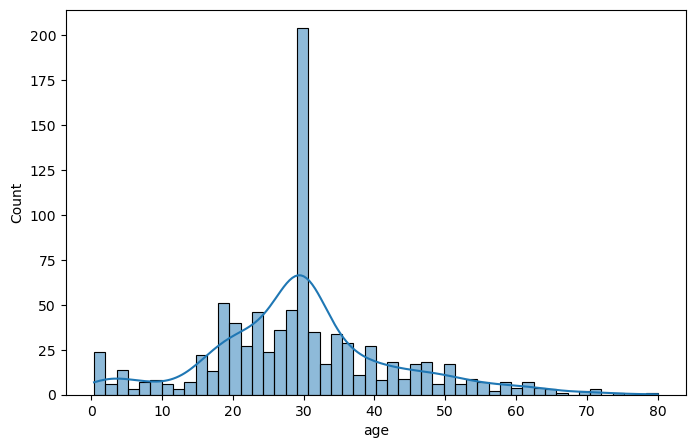

In [94]:
#Histplot of age distribution
plt.figure(figsize=(8,5))
sn.histplot(data['age'],kde=True,bins=50);

### 2.2 Box Plot to Compare fare paid by passengers whon survived and those that do not survived

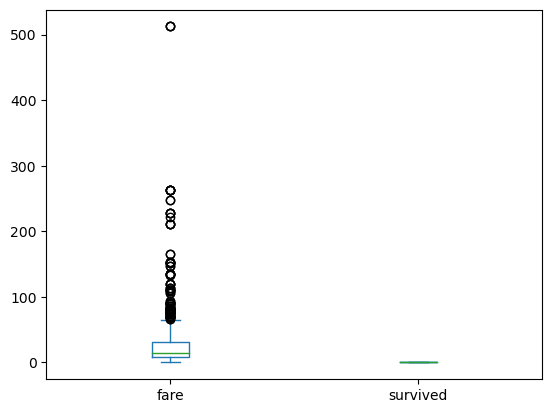

In [102]:
df = pd.DataFrame(data=data,columns=['fare','survived'])
#sn.boxplot(x='survived',y='fare', data=pd.melt(df))
df.plot(kind='box')
plt.show()

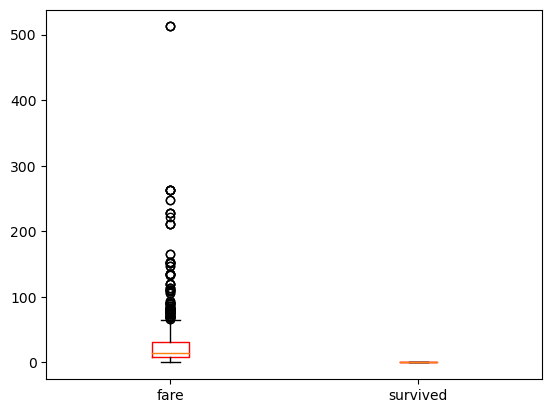

In [109]:
df2=data['fare']
df3=data['survived']
plt.boxplot([df2,df3], boxprops=dict(color='red'),labels=['fare','survived']);

### 2.3 Heatmap to show correlation among the various numeric variable

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_12736\619188005.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sn.heatmap(data.corr(), cmap='YlGnBu', annot=True,)


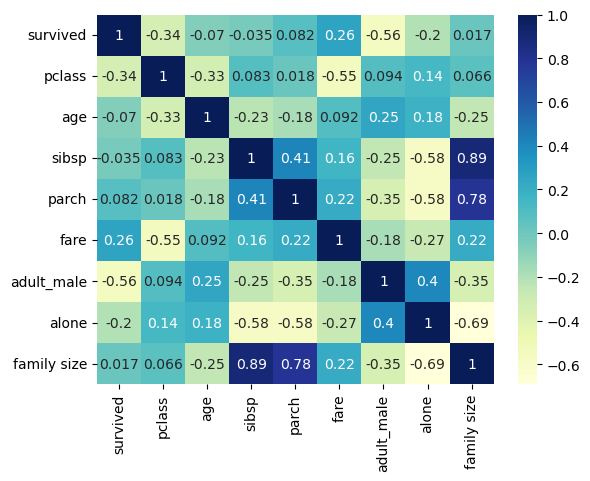

In [118]:
sn.heatmap(data.corr(), cmap='YlGnBu', annot=True,)
plt.show();

### 2.4 Pairplot to observe pairwise relationship between different classes of survived column

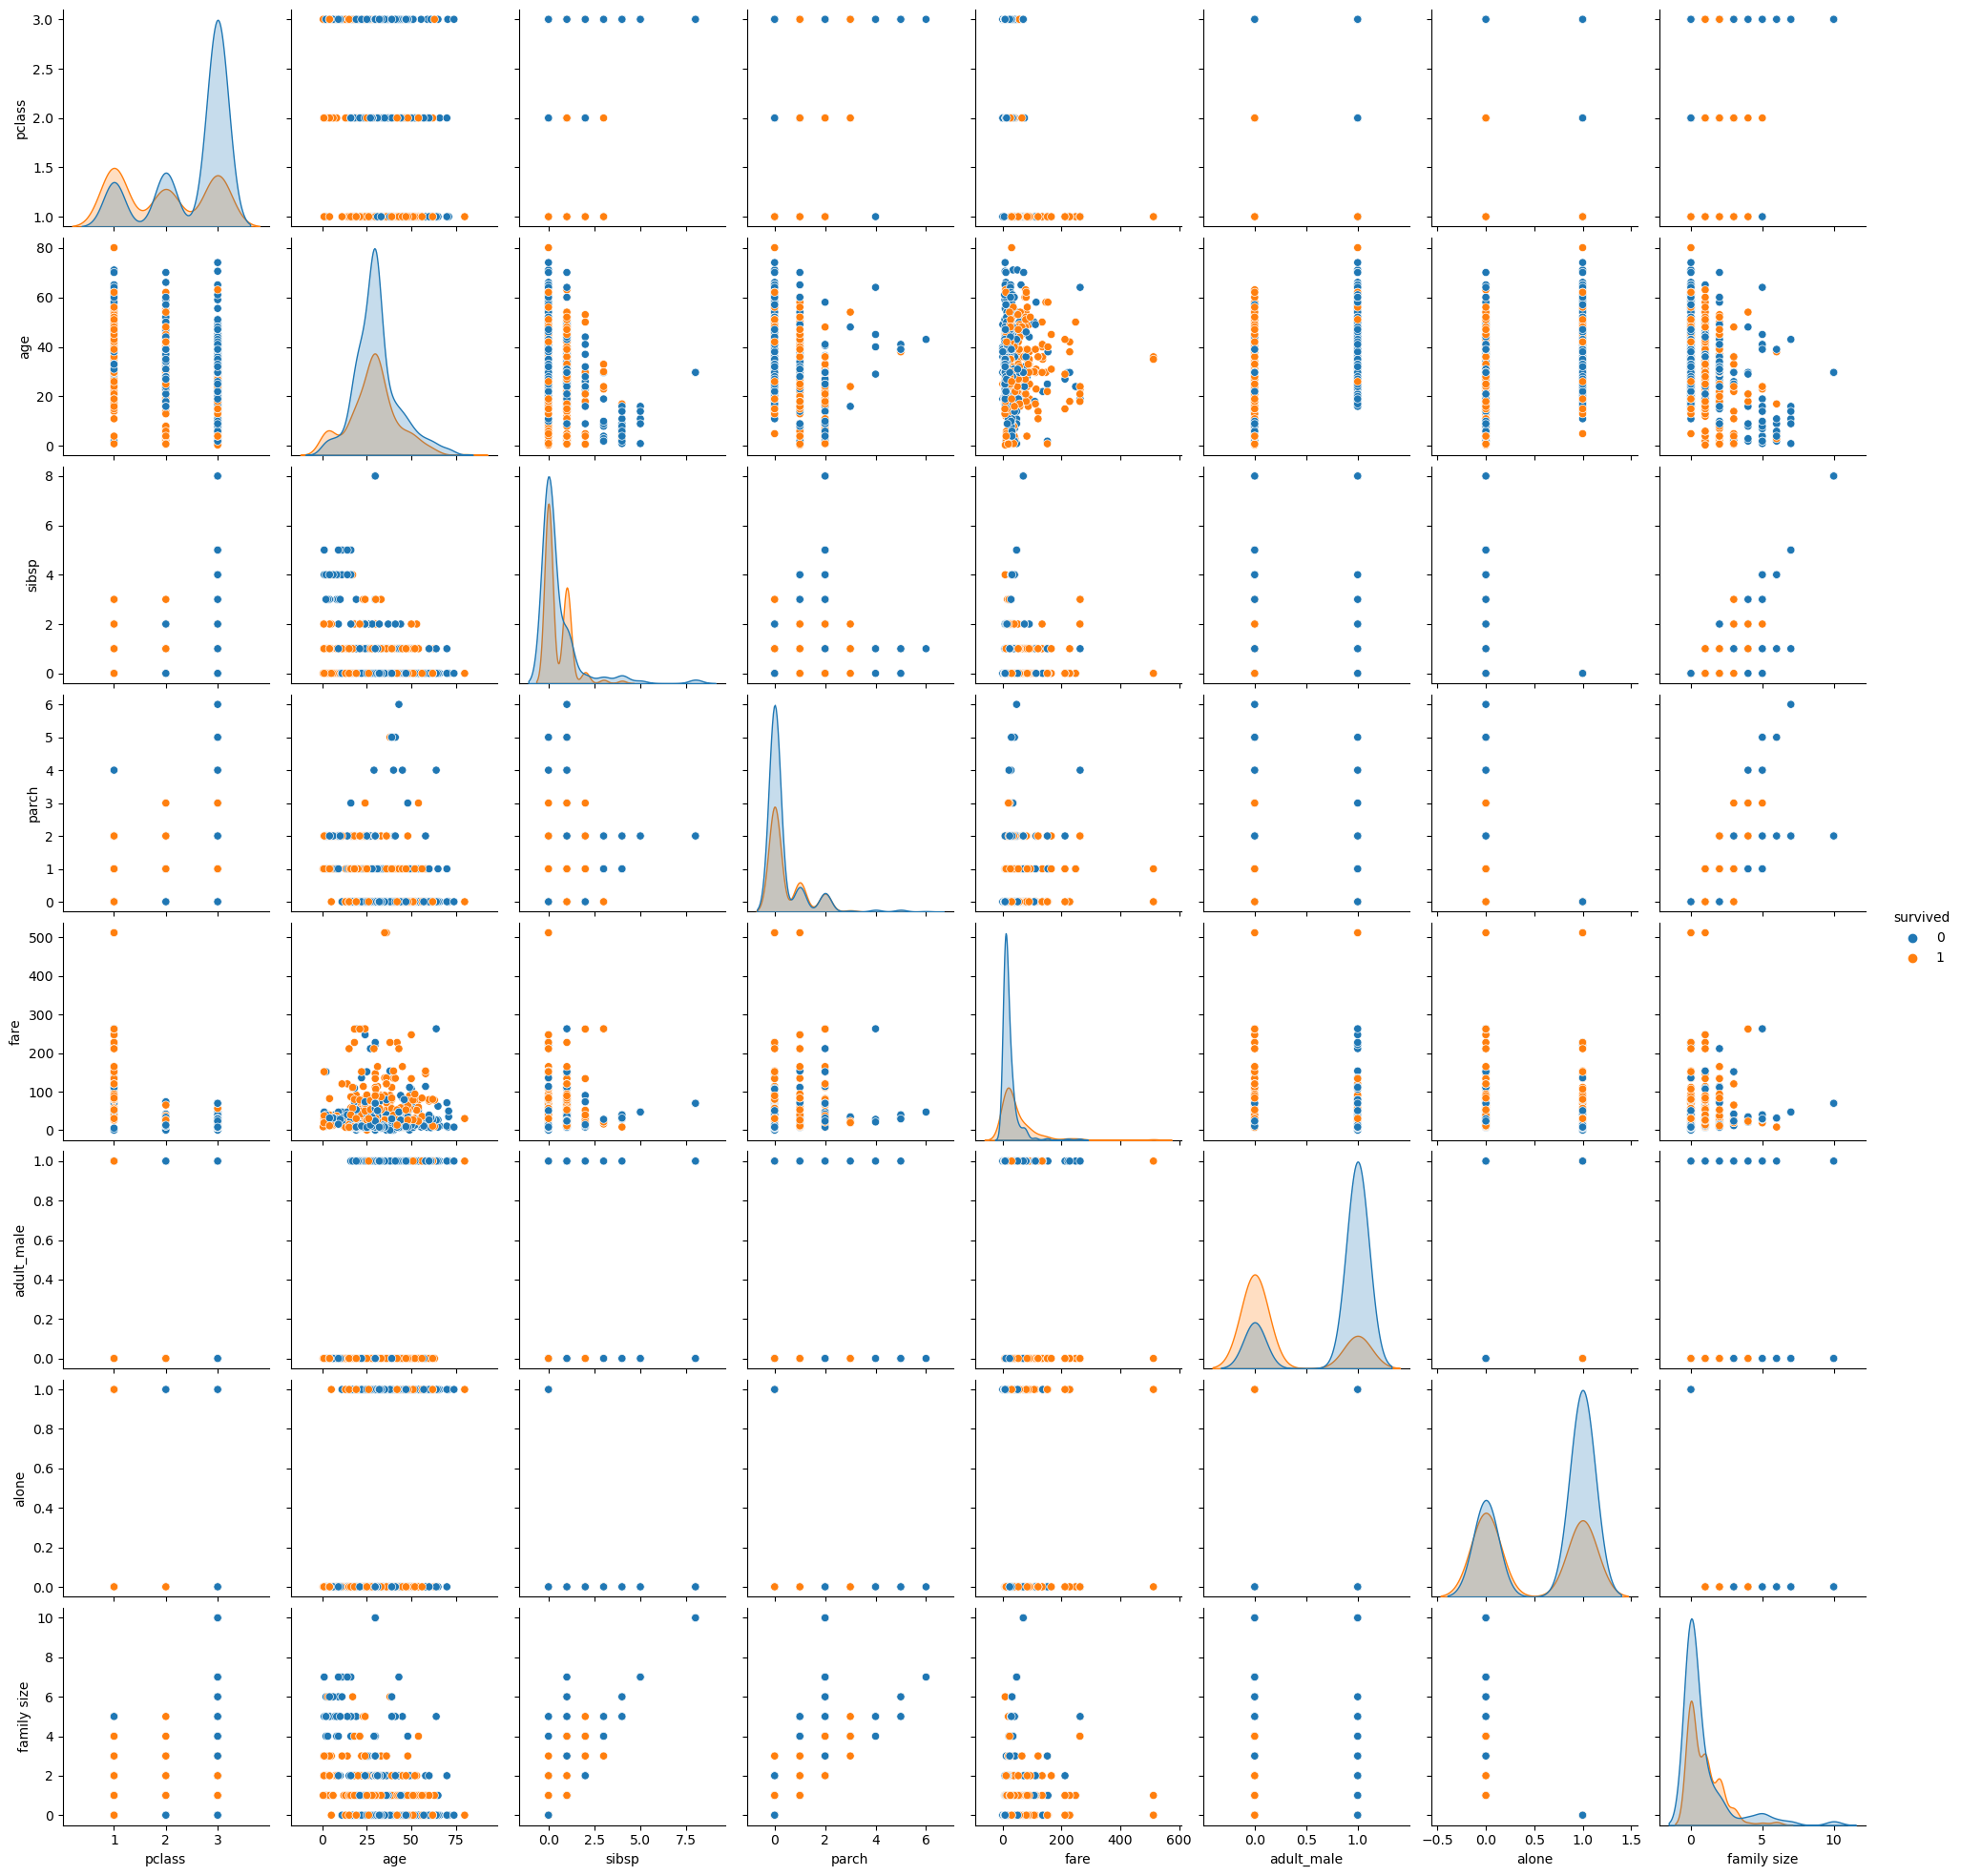

In [122]:
# pairplot
sn.pairplot(data, hue='survived')

### 3 Other visuals

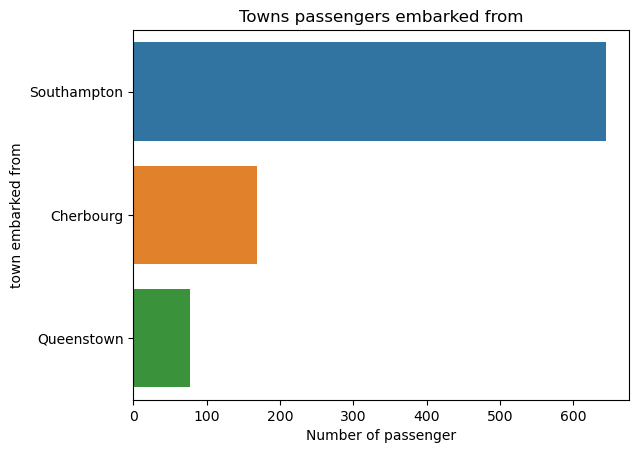

In [115]:
# Finding the towns passenger embarked from
towns=data['embark_town'].value_counts()
sn.barplot(x=towns, y=towns.index)
plt.title('Towns passengers embarked from')
plt.xlabel('Number of passenger')
plt.ylabel('town embarked from');

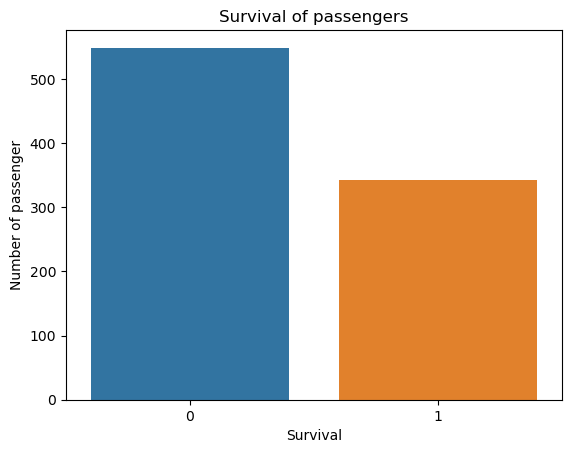

In [121]:
# Finding the survival of passenger
survival=data['survived'].value_counts()
sn.barplot(y=survival, x=survival.index)
plt.title('Survival of passengers')
plt.xlabel('Survival')
plt.ylabel('Number of passenger');

# <h1 style='text-align: center;'> The End </h1>
# <h1 style='text-align: center;'> Thank You </h1>